In [1]:
# load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# left-align tables in markdown
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

In [2]:
# import data
filePath = os.path.join('.','data','imdb.csv')
df = pd.read_csv(filePath)

# preview the data
df.head()

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
0,0,1. The Shawshank Redemption (1994),R,142 min,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M"
1,1,2. The Godfather (1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M"
2,2,3. The Dark Knight (2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M"
3,3,4. The Godfather: Part II (1974),R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M"
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M"


In [3]:
df.describe()

,Unnamed: 0,Rate,Metascore
count,1000.000000,1000.000000,712.000000
mean,499.500000,8.097500,81.001404
std,288.819436,0.169566,9.811801
min,0.000000,8.000000,61.000000
25%,249.750000,8.000000,73.000000
50%,499.500000,8.000000,82.000000
75%,749.250000,8.100000,88.250000
max,999.000000,9.300000,100.000000


In [4]:
# size and shape of data
print('Size: ', df.size, '\tShape: ', df.shape, '\n')

# check for null values
# tells you if a null value exists in each column
print('Null Values\n', df.isnull().any(),'\n\n')
# tells you how many null values exist in each column
print('Null/NaN Count\n', df.isnull().sum(),'\n\n')

# check data types
df.dtypes

Size:  10000 	Shape:  (1000, 10) 

Null Values
 Unnamed: 0     False
Title          False
Certificate     True
Duration       False
Genre          False
Rate           False
Metascore       True
Description    False
Cast           False
Info           False
dtype: bool 


Null/NaN Count
 Unnamed: 0       0
Title            0
Certificate     27
Duration         0
Genre            0
Rate             0
Metascore      288
Description      0
Cast             0
Info             0
dtype: int64 




Unnamed: 0       int64
Title           object
Certificate     object
Duration        object
Genre           object
Rate           float64
Metascore      float64
Description     object
Cast            object
Info            object
dtype: object

### How would you describe this data: clean or messy or somewhere in the middle?
### What problems might you run into based on what you know about the data so far?

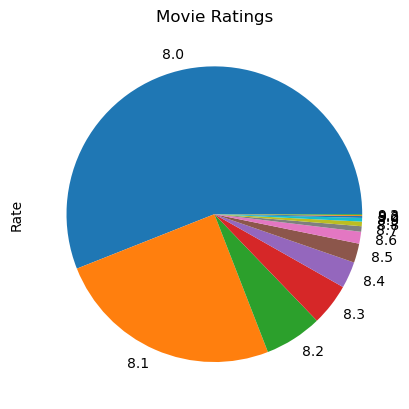

In [5]:
# pie chart using matplotlib
p_pie = df.groupby('Rate')['Rate'].count().plot.pie(
    # autopct = '%.2f%%'
)
p_pie.set_title('Movie Ratings')
plt.show()

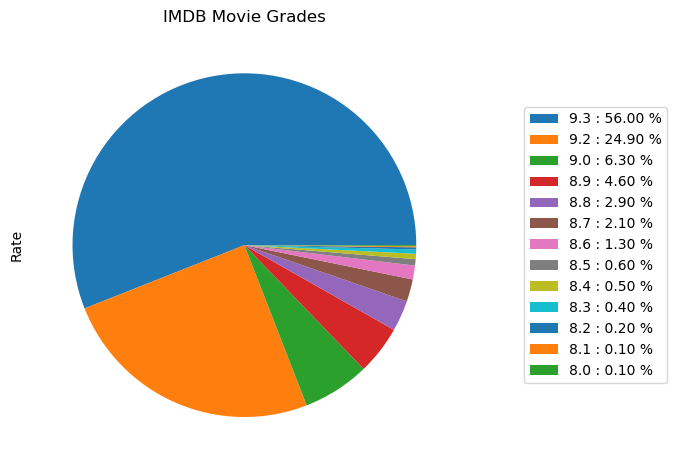

In [6]:
# pie chart using matplotlib
x = df.Rate.unique()
y = df.groupby('Rate')['Rate'].count()
pct = 100.*y/y.sum()

p_pie = df.groupby('Rate')['Rate'].count().plot.pie(labels = None)
p_pie.legend(labels = ['{0} : {1:1.2f} %'.format(i,j) for i,j in zip(x, pct)], 
#             title = 'IMDB Movie Grades',
             loc = 'center right', 
             bbox_to_anchor = (1,0,0.5,1))

p_pie.set_title('IMDB Movie Grades')
plt.tight_layout()
plt.show()

## Let's make a better visual using the same data.

We'll start by grouping the ratings into letter grades, just like in school:

| Letter Grade | Score |
|---|---|
| A+ | 97–100% |
| A | 93–96% |
| A− | 90–92% |
| B+ | 87–89% |
| B | 83–86% |
| B− | 80–82% |
| C+ | 77–79% |
| C | 73–76% |
| C− | 70–72% |
| D+ | 67–69% |
| D | 63–66% |
| D− | 60–62% |
| F | 0–59% |

In [7]:
# We'll need to add a new "Grade" column to the dataframe.
# Let's use numpy to create a nested conditional statement and assign a Letter Grade to each movie in the dataframe:
df['Grade'] = \
    np.where(df['Rate'] < 6,   'F',
    np.where(df['Rate'] < 6.3, 'D-',
    np.where(df['Rate'] < 6.7, 'D',
    np.where(df['Rate'] < 7,   'D+',
    np.where(df['Rate'] < 7.3, 'C-',
    np.where(df['Rate'] < 7.7, 'C',
    np.where(df['Rate'] < 8,   'C+',
    np.where(df['Rate'] < 8.3, 'B-',
    np.where(df['Rate'] < 8.7, 'B',
    np.where(df['Rate'] < 9.0, 'B+',
    np.where(df['Rate'] < 9.3, 'A-',
    np.where(df['Rate'] < 9.7, 'A', 
    'A+'))))))))))))

# Let's check to make sure our new "Grade" column is in the dataframe.
# This time, we'll preview the first 5 rows and only show the Title, Rate, and Grade columns:
df.loc[:,['Title', 'Rate', 'Grade']].head()

,Title,Rate,Grade
0,1. The Shawshank Redemption (1994),9.3,A
1,2. The Godfather (1972),9.2,A-
2,3. The Dark Knight (2008),9.0,A-
3,4. The Godfather: Part II (1974),9.0,A-
4,5. The Lord of the Rings: The Return of the Ki...,8.9,B+


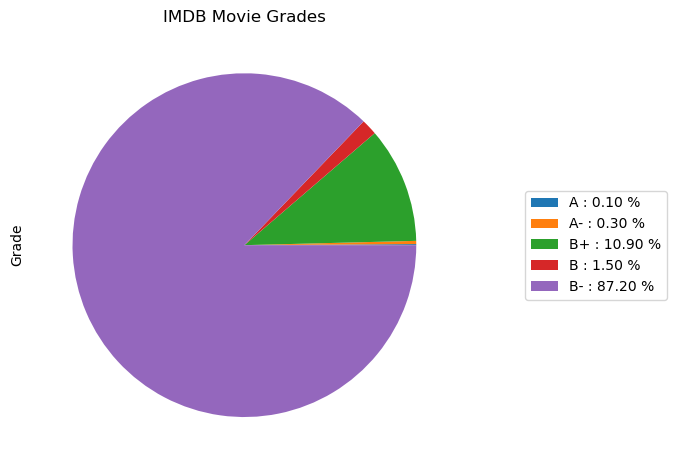

In [8]:
# Great, our new "Grade" column is now part of the dataframe.
# Let's see how our pie chart looks when we use the "Grade" column instead of the "Rate" column

x = np.char.array(['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F'])
y = df.groupby('Grade')['Grade'].count()
pct = 100.*y/y.sum()

p_pie = df.groupby('Grade')['Grade'].count().plot.pie(labels = None)
p_pie.legend(labels = ['{0} : {1:1.2f} %'.format(i,j) for i,j in zip(x, pct)], 
#             title = 'IMDB Movie Grades',
             loc = 'center right', 
             bbox_to_anchor = (1,0,0.5,1))

p_pie.set_title('IMDB Movie Grades')
plt.tight_layout()
plt.show()

## Wow, that's much better! 

The technical term for what we've just done here is "binning," like "putting things into bins."
Binning is useful for creating groups of rows with similar (but not identical) values.  

## Questions

- Can you think of any examples where you've seen binning used in a chart or graph in the real world?
- If so, do you think it helped make the data easier to understand?  
  



# Handling missing data

##### Here, we will create a copy of the dataframe for each of the three methods so we can more easily explore the differences in what happens in each scenario.
##### Creating a copy will allow us to make changes without also altering the original df (e.g. if we were to use df_new = df).

In [10]:
df_drop = df.copy()
df_mean = df.copy()
df_median = df.copy()
df_mode = df.copy()

#### Filling with mode

#### We'll compare what happens to the Certificate column via countplot

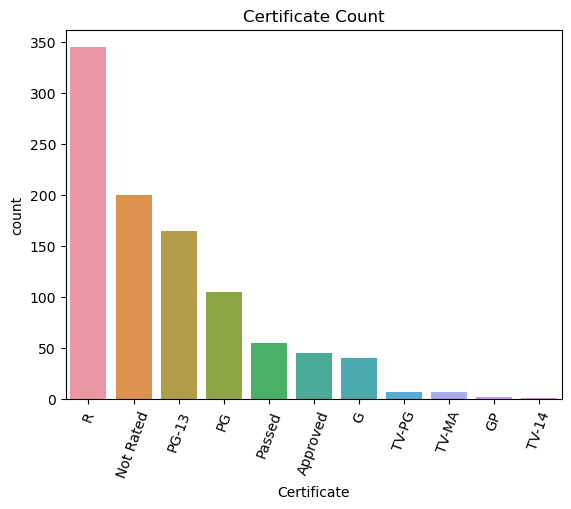

In [11]:
# create countplot for Certificate
s_count = sns.countplot(
    data = df,
    x = df['Certificate'], 
    order = df['Certificate'].value_counts().index
).set_title('Certificate Count')

# rotate x-axis tick marks for better visibility
plt.xticks(rotation=70)

plt.show()

##### Note that the chart above does not show any NaNs, yet we know that there are 27 NaN values - we haven't dropped anything. Seaborn does not include NaNs in its countplots. The benefit is that for this particular visual, it means we can skip writing that code. The downside is that it can have effects elsewhere that maybe we don't want.

##### We have a couple options:
* We can force Seaborn to count the NaN/null values by filling in the missing data; this this is categorical, we can just use the word "missing" or similar
* We can use Pandas or Matplotlib instead

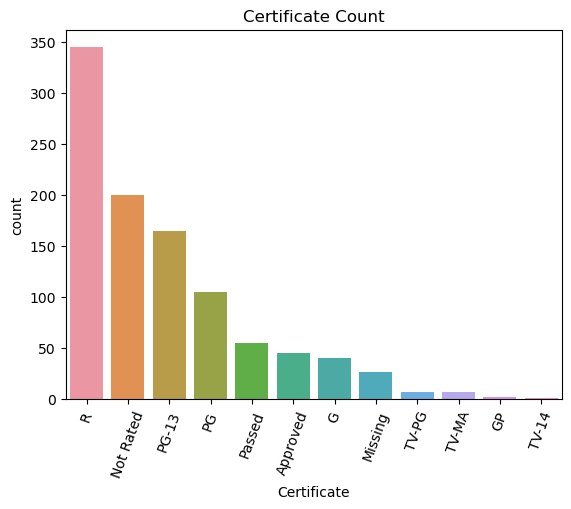

In [12]:
# option 1: we can fill the Nan/null values with 'Missing' so Seaborn will count those

df_missing = df.copy()

s_count = sns.countplot(
    data = df_missing.Certificate.fillna('Missing', inplace = True),
    x = df_missing['Certificate'], 
    order = df_missing['Certificate'].value_counts().index
).set_title('Certificate Count')

# rotate x-axis tick marks for better visibility
plt.xticks(rotation=70)

plt.show()

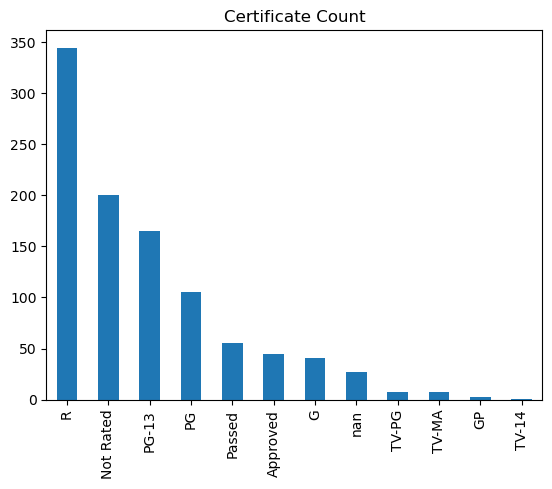

In [13]:
# countplot using Pandas
df.Certificate.value_counts(dropna=False).plot(kind='bar').set_title('Certificate Count')

plt.show()

##### We'll use fillna() to fill with the mode and we'll see how this looks when we plot this next.
##### Because we will be making a modification to the dataframe that we don't necessarily want to keep, we'll use df_mode

In [14]:
# fillna()
df_mode['Certificate'].fillna(df_mode['Certificate'].mode()[0], inplace = True)

# tells you how many null values exist in each column
print('Original Null/NaN Count\n', df.isnull().sum(),'\n\n')
print('New Null/NaN Count\n', df_mode.isnull().sum(),'\n\n')

Original Null/NaN Count
 Unnamed: 0       0
Title            0
Certificate     27
Duration         0
Genre            0
Rate             0
Metascore      288
Description      0
Cast             0
Info             0
Grade            0
dtype: int64 


New Null/NaN Count
 Unnamed: 0       0
Title            0
Certificate      0
Duration         0
Genre            0
Rate             0
Metascore      288
Description      0
Cast             0
Info             0
Grade            0
dtype: int64 




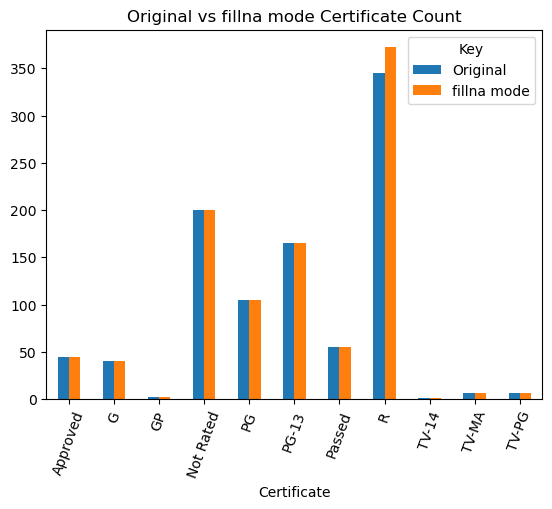

In [15]:
# show plots from two different dataframes in single visual

  #create copies (again, we don't necessarily want to alter what we've done to these so far - this won't always be the case)
df1 = df.copy()
df2 = df_mode.copy()

  # add new column called 'Key' to each of the new dataframes we created
df1['Key'] = 'Original'
df2['Key'] = 'fillna mode'

  # combine the two dataframes
df_new = pd.concat([df1, df2], keys = ['Original', 'fillna mode'])

dfgroup = df_new.groupby(['Certificate', 'Key'])

  #created plot using matplotlib
dfgroup_plot = dfgroup['Certificate'].count().unstack('Key').plot(kind = 'bar')

dfgroup_plot.set_title('Original vs fillna mode Certificate Count')

# rotate x-axis tick marks for better visibility
plt.xticks(rotation=70)

plt.show()

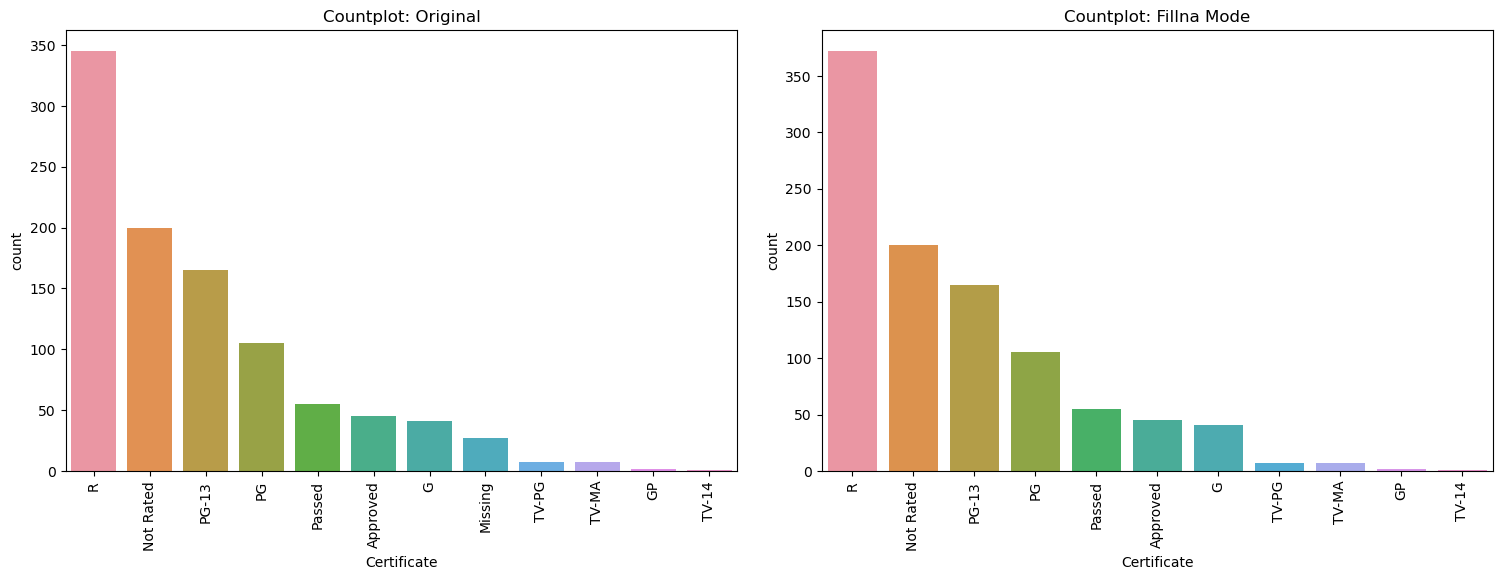

In [16]:
# same as above, but to show two separate plots in a single output

# set subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex = False)
# adjust spacing between subplots (if vertical, would use h_pad)
f.tight_layout(w_pad = 3)

sns.countplot(data = df_missing, 
              x = 'Certificate', 
              order = df_missing['Certificate'].value_counts().index, 
              ax = ax1
             ).set_title('Countplot: Original')
sns.countplot(data = df_mode, 
              x = 'Certificate', 
              order = df_mode['Certificate'].value_counts().index,
              ax = ax2
             ).set_title('Countplot: Fillna Mode')

# rotate x-axis tick marks for better visibility
# we cannot use plt.xticks (rotation = []) because of how we have these set up
# were you to show each figure in a different cell, you could use plt.xticks
ax1.tick_params(axis = 'x', labelrotation = 90)
ax2.tick_params(axis = 'x', labelrotation = 90)

plt.show()

##### We can see that between the original and filling NaNs with the mode that every count stayed the same except for 'R'
##### Since R started as the certificate with the highest count and we used the mode to fill the NaNs

#### Test out different methods the Metascore column

##### Try using countplots, histograms, or other visuals as fits well with the data

In [17]:
# check status of dfs so you know what you're working with first
# fill missing values as necessary

# check status of dfs
print('df_missing\n', df_missing.isna().sum())
print('\ndf_mean\n', df_mean.isna().sum())
print('\ndf_median\n', df_median.isna().sum())
print('\ndf_mode\n', df_mode.isna().sum())

df_missing
 Unnamed: 0       0
Title            0
Certificate      0
Duration         0
Genre            0
Rate             0
Metascore      288
Description      0
Cast             0
Info             0
Grade            0
dtype: int64

df_mean
 Unnamed: 0       0
Title            0
Certificate     27
Duration         0
Genre            0
Rate             0
Metascore      288
Description      0
Cast             0
Info             0
Grade            0
dtype: int64

df_median
 Unnamed: 0       0
Title            0
Certificate     27
Duration         0
Genre            0
Rate             0
Metascore      288
Description      0
Cast             0
Info             0
Grade            0
dtype: int64

df_mode
 Unnamed: 0       0
Title            0
Certificate      0
Duration         0
Genre            0
Rate             0
Metascore      288
Description      0
Cast             0
Info             0
Grade            0
dtype: int64


In [18]:
# fillna with mean
df_mean['Metascore'].fillna((df_mean['Metascore'].mean()), inplace=True)

# check that no NaN/nulls are remaining
# it's always good to check that your code has done what you think you told it to do
df_mean['Metascore'].isna().sum()

0

In [19]:
# fillna with mean
df_median['Metascore'].fillna((df_median['Metascore'].median()), inplace=True)

# check that no NaN/nulls are remaining
# it's always good to check that your code has done what you think you told it to do
df_median['Metascore'].isna().sum()

0

In [20]:
# fillna with median
df_drop.dropna(subset = ['Metascore'], inplace=True)

# check that no NaN/nulls are remaining
# it's always good to check that your code has done what you think you told it to do
df_drop['Metascore'].isna().sum()

0

In [21]:
# fillna with mode
df_mode['Metascore'].fillna(df_mode['Metascore'].mode()[0], inplace = True)

# check that no NaN/nulls are remaining
# it's always good to check that your code has done what you think you told it to do
df_mode['Metascore'].isna().sum()

0

In [22]:
# check status of dfs again to make sure you didn't miss anything
# we won't worry about imputing missing categorical data with statistical methods
print('original df\n', df.isna().sum())
print('\ndf_mean\n', df_mean.isna().sum())
print('\ndf_median\n', df_median.isna().sum())
print('\ndf_mode\n', df_mode.isna().sum())

original df
 Unnamed: 0       0
Title            0
Certificate     27
Duration         0
Genre            0
Rate             0
Metascore      288
Description      0
Cast             0
Info             0
Grade            0
dtype: int64

df_mean
 Unnamed: 0      0
Title           0
Certificate    27
Duration        0
Genre           0
Rate            0
Metascore       0
Description     0
Cast            0
Info            0
Grade           0
dtype: int64

df_median
 Unnamed: 0      0
Title           0
Certificate    27
Duration        0
Genre           0
Rate            0
Metascore       0
Description     0
Cast            0
Info            0
Grade           0
dtype: int64

df_mode
 Unnamed: 0     0
Title          0
Certificate    0
Duration       0
Genre          0
Rate           0
Metascore      0
Description    0
Cast           0
Info           0
Grade          0
dtype: int64


In [23]:
# for the purpose of this exercise, we'll drop missing categorical data, though this is not always what you want to do
# because there are so few categorical data missing, we'll just drop them and recheck that we have no missing categorical values
df.dropna(subset = ['Certificate'], inplace=True)
df_mean.dropna(subset = ['Certificate'], inplace=True)
df_median.dropna(subset = ['Certificate'], inplace=True)
df_mode.dropna(subset = ['Certificate'], inplace=True)

# check status of dfs again to make sure you didn't miss anything
print('original df\n', df.isna().sum())
print('\ndf_mean\n', df_mean.isna().sum())
print('\ndf_median\n', df_median.isna().sum())
print('\ndf_mode\n', df_mode.isna().sum())

original df
 Unnamed: 0       0
Title            0
Certificate      0
Duration         0
Genre            0
Rate             0
Metascore      261
Description      0
Cast             0
Info             0
Grade            0
dtype: int64

df_mean
 Unnamed: 0     0
Title          0
Certificate    0
Duration       0
Genre          0
Rate           0
Metascore      0
Description    0
Cast           0
Info           0
Grade          0
dtype: int64

df_median
 Unnamed: 0     0
Title          0
Certificate    0
Duration       0
Genre          0
Rate           0
Metascore      0
Description    0
Cast           0
Info           0
Grade          0
dtype: int64

df_mode
 Unnamed: 0     0
Title          0
Certificate    0
Duration       0
Genre          0
Rate           0
Metascore      0
Description    0
Cast           0
Info           0
Grade          0
dtype: int64


#### Method 1 or Visual Choice 1

Follow either the same method for all your visuals  (e.g. create all visuals using dropna or fillna mean)
-OR-
Use the same visual for multiple methods to see the effect different methods have on your visuals

Think about what you want to make and why - maybe you want to deliberately make a good visual and maybe you don't.
Regardless, after you create a visual ask yourself:
1. Was this useful? Why or why not?
2. What did I learn from this visual and why is it important?

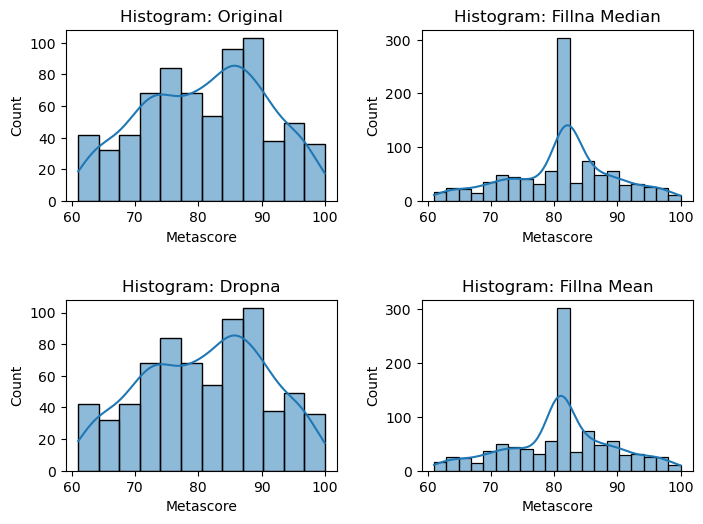

In [24]:
# histogram

# set subplots
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 5), sharex = False)
# adjust spacing between subplots (w_pad for width between plots, h_pad for vertical between plots)
f.tight_layout(w_pad = 3, h_pad = 5)

sns.histplot(data = df, x = 'Metascore', kde=True, ax = ax1).set_title('Histogram: Original')
sns.histplot(data = df_median, x = 'Metascore', kde=True, ax = ax2).set_title('Histogram: Fillna Median')
sns.histplot(data = df_drop, x = 'Metascore', kde=True, ax = ax3).set_title('Histogram: Dropna')
sns.histplot(data = df_mean, x = 'Metascore', kde=True, ax = ax4).set_title('Histogram: Fillna Mean')


plt.show()

##### Note that the mean and median look very similar, as do the original and dropna histograms. Why is that?

If we look back to the beginning where we have our df.describe(), we can see that our mean and median are very close.
Our mean is 81 and our median (50% value) is 82.

As for the dropna and original, if we look back to the beginning where we found our NaN/null count and df shape, remember that our df has 10,000 records (rows) and we have fewer than 288 NaN/null values. From a percentage standpoint, that's very few missing values.

We can clearly see here that the choices we make when handling - or not handling - missing data points can have a significant effect on how the data is percieved.

#### Method 2 or Visual Choice 2

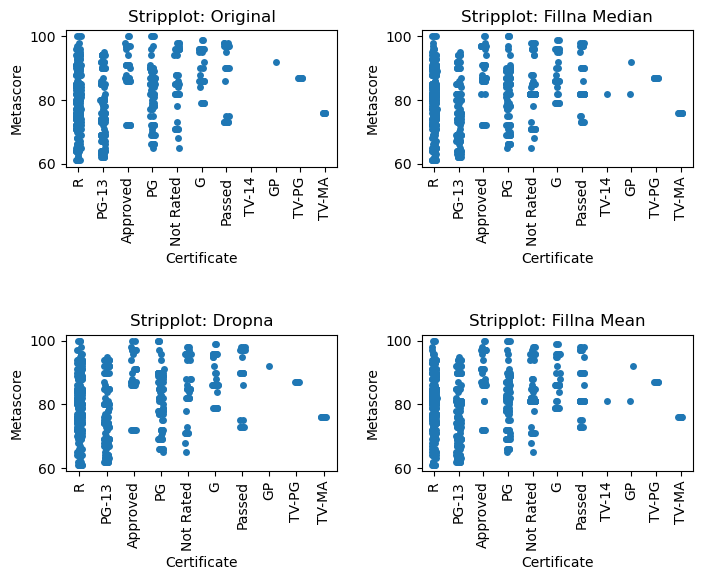

In [25]:
# stripplot - shows distributions of categorical data

# set subplots
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 5), sharex = False)
# adjust spacing between subplots (w_pad for width between plots, h_pad for vertical between plots)
f.tight_layout(w_pad = 3, h_pad = 10)

sns.stripplot(data = df, x = 'Certificate', y = 'Metascore', jitter = True, ax = ax1).set_title('Stripplot: Original')
sns.stripplot(data = df_median, x = 'Certificate', y = 'Metascore', jitter = True, ax = ax2).set_title('Stripplot: Fillna Median')
sns.stripplot(data = df_drop, x = 'Certificate', y = 'Metascore', jitter = True, ax = ax3).set_title('Stripplot: Dropna')
sns.stripplot(data = df_mean, x = 'Certificate', y = 'Metascore', jitter = True, ax = ax4).set_title('Stripplot: Fillna Mean')

# rotate x-axis tick marks for better visibility
# we cannot use plt.xticks (rotation = []) because of how we have these set up
# were you to show each figure in a different cell, you could use plt.xticks
ax1.tick_params(axis = 'x', labelrotation = 90)
ax2.tick_params(axis = 'x', labelrotation = 90)
ax3.tick_params(axis = 'x', labelrotation = 90)
ax4.tick_params(axis = 'x', labelrotation = 90)

plt.show()


#### Method 3 or Visual Choice 3

In [26]:
# is there a relation between duration and metascore?
# we'll need to do some manipulating before we can plot this well
# first, we need to change Duration from an object to a string in each dataframe
df['Duration'] = df['Duration'].astype('string')
df_mean['Duration'] = df['Duration'].astype('string')
df_median['Duration'] = df['Duration'].astype('string')
df_mode['Duration'] = df['Duration'].astype('string')

#check to make sure Duration did indeed get successfully changed to a string
print('df', df.info())
print('df_mean', df.info())
print('df_median', df.info())
print('df_mode', df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   973 non-null    int64  
 1   Title        973 non-null    object 
 2   Certificate  973 non-null    object 
 3   Duration     973 non-null    string 
 4   Genre        973 non-null    object 
 5   Rate         973 non-null    float64
 6   Metascore    712 non-null    float64
 7   Description  973 non-null    object 
 8   Cast         973 non-null    object 
 9   Info         973 non-null    object 
 10  Grade        973 non-null    object 
dtypes: float64(2), int64(1), object(7), string(1)
memory usage: 123.5+ KB
df None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   973 non-null    int64  
 1   Title        973 non-null    o

In [27]:
# split on delimiter ' ' and add new column 'Duration Type' (in the event we need this later for some reason)
df[['Duration', 'Duration Type']] = df['Duration'].str.split(' ', expand=True)
df_mean[['Duration', 'Duration Type']] = df_mean['Duration'].str.split(' ', expand=True)
df_median[['Duration', 'Duration Type']] = df_median['Duration'].str.split(' ', expand=True)
df_mode[['Duration', 'Duration Type']] = df_mode['Duration'].str.split(' ', expand=True)

In [28]:
#check to make sure your dfs look the way you think they should
print('df', df.info())
print('df_mean', df.info())
print('df_median', df.info())
print('df_mode', df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     973 non-null    int64  
 1   Title          973 non-null    object 
 2   Certificate    973 non-null    object 
 3   Duration       973 non-null    string 
 4   Genre          973 non-null    object 
 5   Rate           973 non-null    float64
 6   Metascore      712 non-null    float64
 7   Description    973 non-null    object 
 8   Cast           973 non-null    object 
 9   Info           973 non-null    object 
 10  Grade          973 non-null    object 
 11  Duration Type  973 non-null    string 
dtypes: float64(2), int64(1), object(7), string(2)
memory usage: 131.1+ KB
df None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0 

In [29]:
# duration is a string in the dfs but we want it to be numeric
df['Duration'] = pd.to_numeric(df['Duration'])
df_mean['Duration'] = pd.to_numeric(df_mean['Duration'])
df_median['Duration'] = pd.to_numeric(df_median['Duration'])
df_mode['Duration'] = pd.to_numeric(df_mode['Duration'])

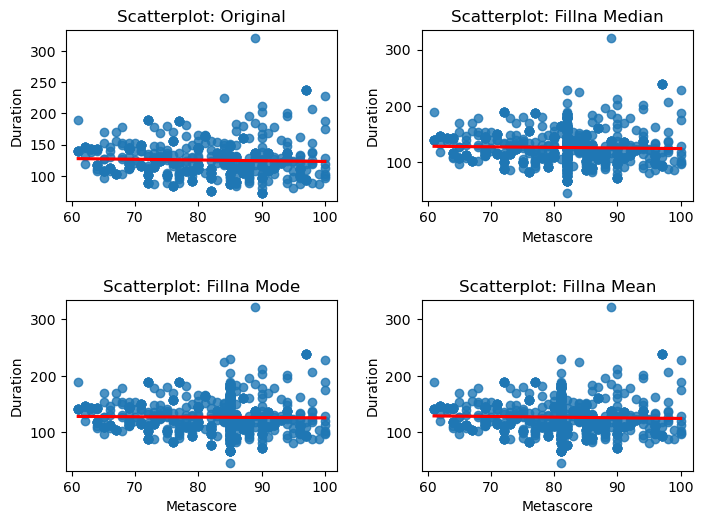

In [30]:
# create scatterplot with trendline, called a regplot

# set subplots
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 5), sharex = False)
# adjust spacing between subplots (w_pad for width between plots, h_pad for vertical between plots)
f.tight_layout(w_pad = 3, h_pad = 5)

sns.regplot(data = df, 
            x = 'Metascore', 
            y = 'Duration', 
            ci = False, 
            line_kws = {'color' : 'red'}, 
            ax = ax1
           ).set_title('Scatterplot: Original')
sns.regplot(data = df_median, 
            x = 'Metascore', 
            y = 'Duration', 
            ci = False, 
            line_kws = {'color' : 'red'}, 
            ax = ax2
           ).set_title('Scatterplot: Fillna Median')
sns.regplot(data = df_mode, 
            x = 'Metascore', 
            y = 'Duration', 
            ci = False, 
            line_kws = {'color' : 'red'}, 
            ax = ax3
           ).set_title('Scatterplot: Fillna Mode')
sns.regplot(data = df_mean, 
            x = 'Metascore', 
            y = 'Duration', 
            ci = False, 
            line_kws = {'color' : 'red'}, 
            ax = ax4
           ).set_title('Scatterplot: Fillna Mean')

plt.show()

#### Questions to ask yourself
##### Did all your visuals turn out as useful as you thought they would be? Why or why not?
##### What did you learn?